In [1]:
#finds all .jpg files in a specified folder

import os
from os import listdir

#change path for different folders
path = "/Users/chrisorear/Downloads/OneDrive_1_1-22-2024"
img_list = []
file_list = os.listdir(path)
for i in range(len(file_list)): #the range argument lets me iterate through integers
    if (file_list[i].endswith(".jpg")):
        img_list.append(file_list[i]) #append function appends to end of list
print(img_list)
    

['2023-12-18-10-44-58.jpg', '2023-12-18-10-44-52.jpg', '2023-12-18-10-44-55.jpg', '2023-12-18-10-45-00.jpg']


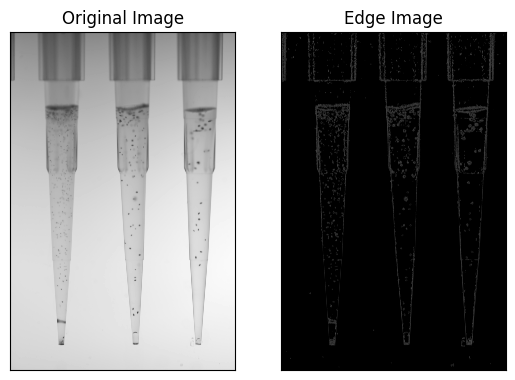

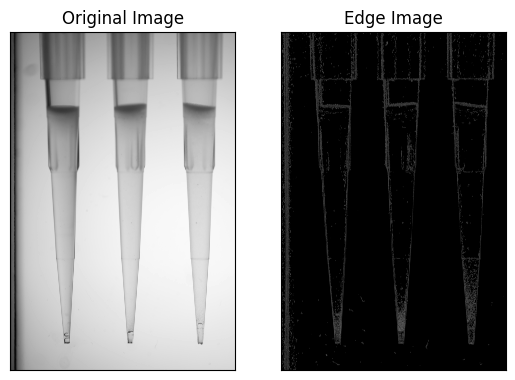

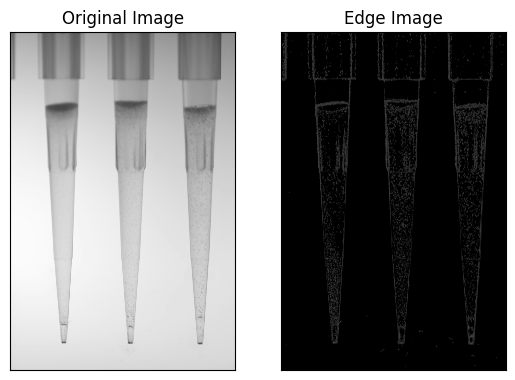

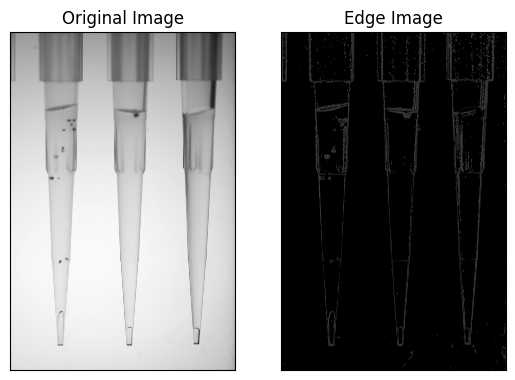

<Figure size 640x480 with 0 Axes>

In [2]:
#edge detection 

import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd

#reads in image as grayscale, gaussian blurs it to reduce noise, edge detection with Canny function 
images = []
blurred_images = []
edge_images = []
for img in img_list:
    images.append(cv2.imread(path+'/'+img, cv2.IMREAD_GRAYSCALE))
for img in images:  
    blurred_images.append(cv2.GaussianBlur(img,(5,5),0))
for img in blurred_images:
    edge_images.append(cv2.Canny(img,3,10))

#plot original and edge image
for i in range(len(edge_images)):
    plt.subplot(121), plt.imshow(images[i], cmap ='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(edge_images[i],cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.figure()

32873 objects were found in this image.


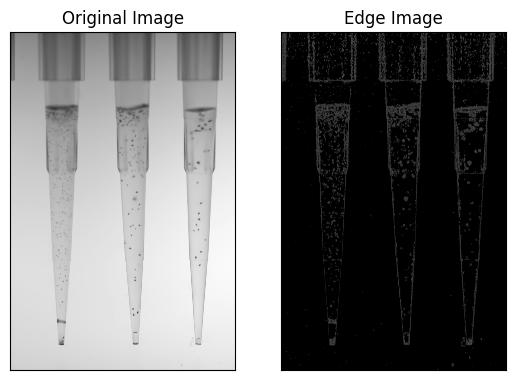

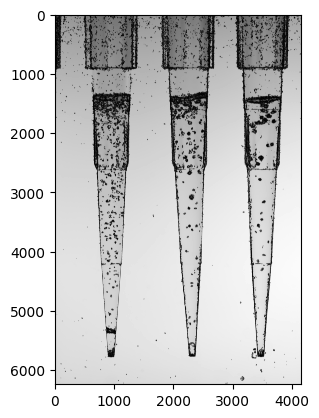

In [4]:
#reads in image as grayscale, gaussian blurs it to reduce noise, edge detection with Canny function 
image = images[0]
blurred_image = cv2.GaussianBlur(image,(3,3),0)
edge_image = cv2.Canny(blurred_image,3,12)

#plot original and edge image
plt.subplot(121), plt.imshow(image, cmap ='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edge_image,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

contours, _ = cv2.findContours(edge_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
cv2.drawContours(image_copy,contours,-1, (0,0,255), 3)
print(len(contours), "objects were found in this image.")

plt.figure()
plt.imshow(image_copy, cmap = 'gray')


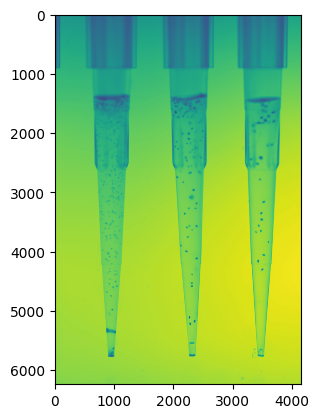

In [17]:
plt.imshow(images[0])

In [1]:
#Test for HEIC to JPG converter - try to use pyheif library but still need to pipinstall
from PIL import Image
import pyheif

image = Image.open("/Users/chrisorear/Downloads/IMG_4470.HEIC")
image.convert('RGB').save('example.jpg')

UnidentifiedImageError: cannot identify image file '/Users/chrisorear/Downloads/IMG_4470.HEIC'